In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/kathanbhavsar/Desktop/Python,DS,ML/DATA/hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,51.60900,11.287001,18.0,43.0,51.0,60.0,90.0
physical_score,5000.0,32.76026,8.169802,-0.0,26.7,35.3,38.9,50.0
test_result,5000.0,0.60000,0.489947,0.0,0.0,1.0,1.0,1.0


In [5]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

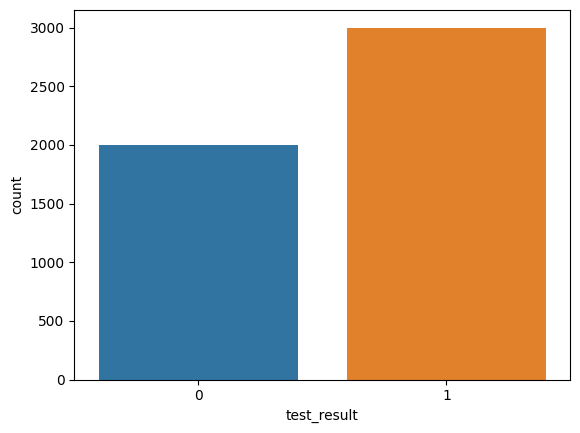

In [6]:
sns.countplot(data=df, x='test_result')
plt.show()

<AxesSubplot:xlabel='test_result', ylabel='age'>

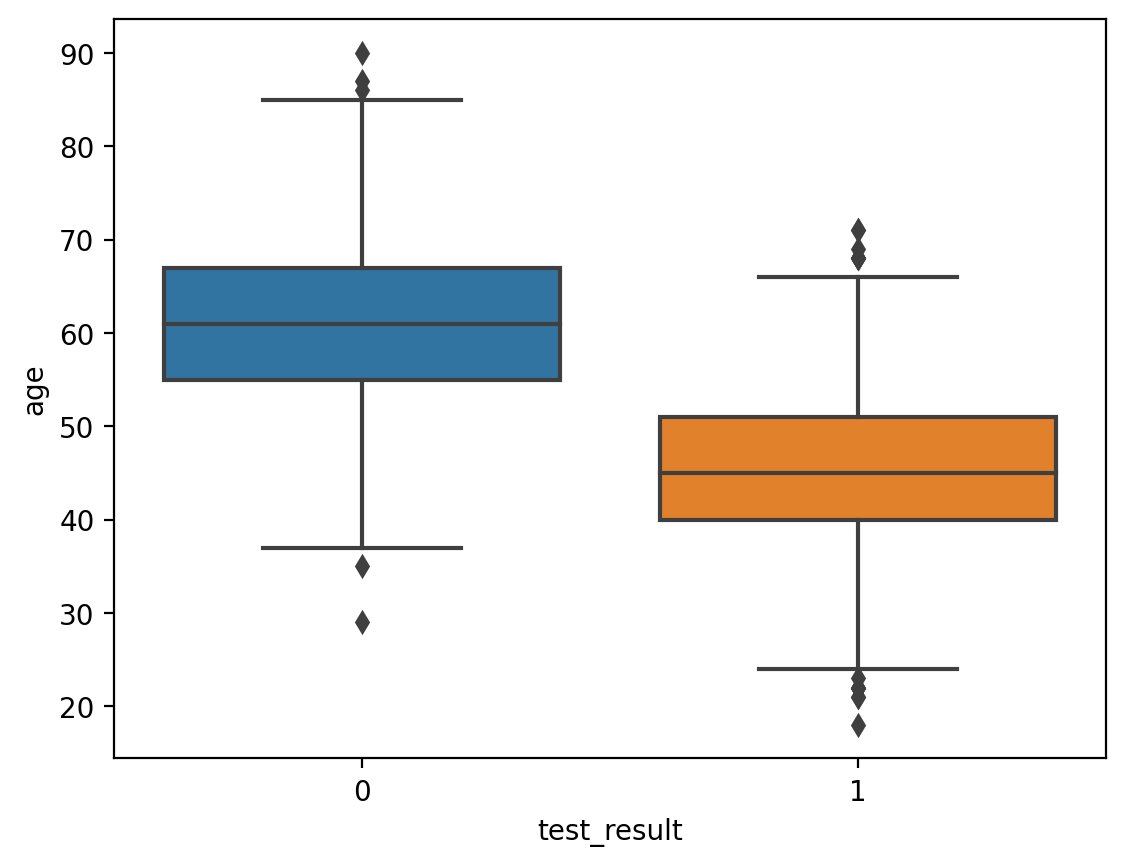

In [7]:
plt.figure(dpi=200)
sns.boxplot(x = 'test_result',y = 'age',data=df) ## This plot shows us that people with greater age tends to fail the exam more!

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

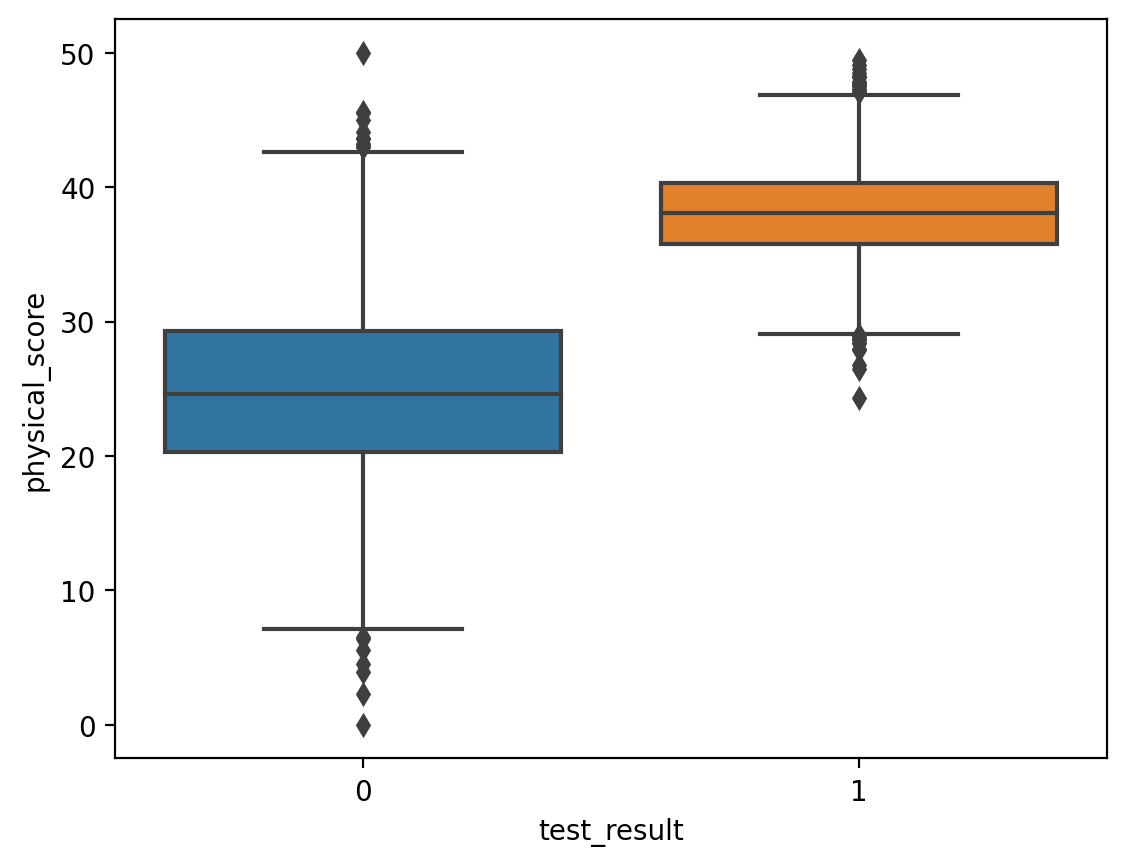

In [8]:
plt.figure(dpi=200)
sns.boxplot(x = 'test_result',y = 'physical_score',data=df) ## This plot shows us that people with greater age tends to fail the exam more!

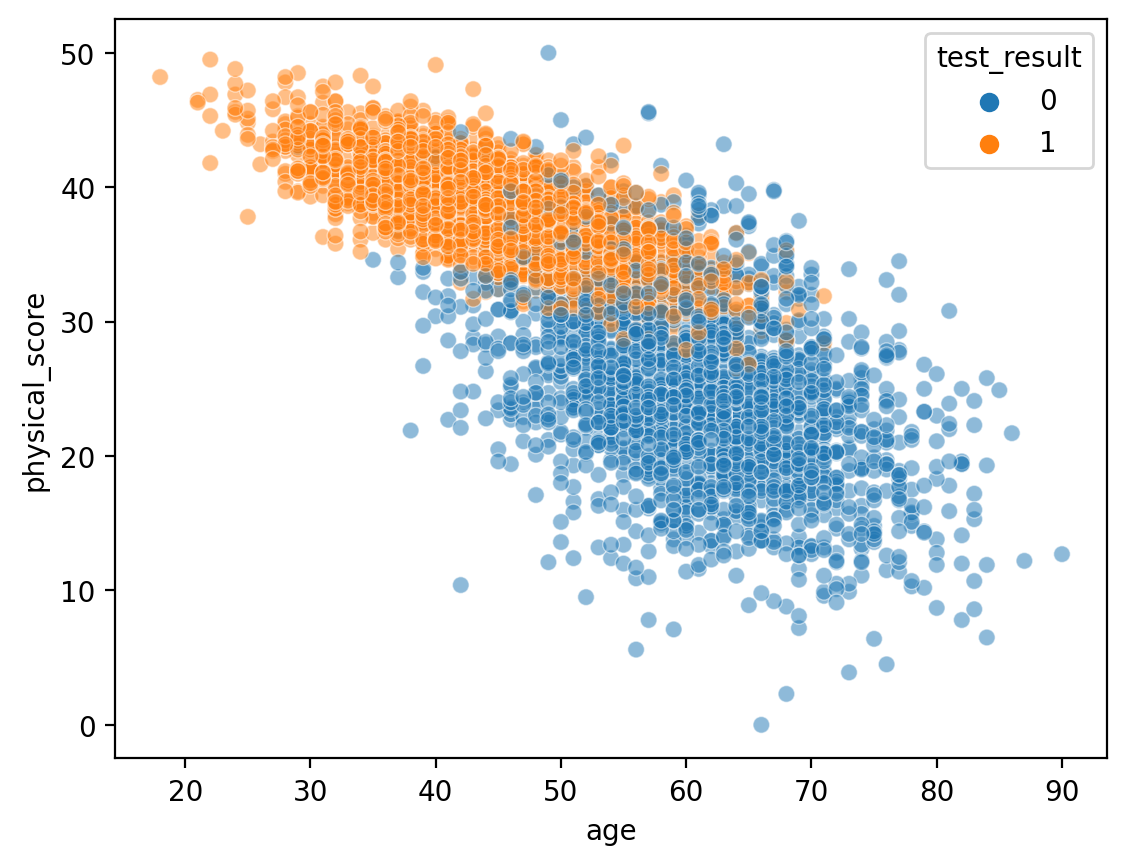

In [9]:
plt.figure(dpi = 200)
sns.scatterplot(x = 'age', y= 'physical_score',data = df,hue = 'test_result',alpha = 0.5)
plt.show()

<Figure size 1280x960 with 0 Axes>

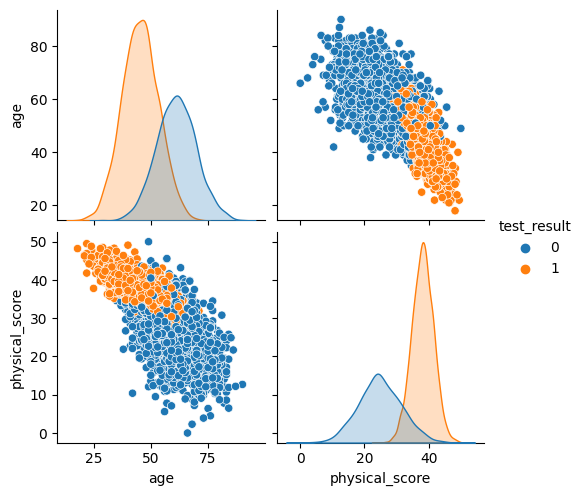

In [43]:
plt.figure(dpi=200)
sns.pairplot(data=df,hue = 'test_result')
plt.show()

<AxesSubplot:>

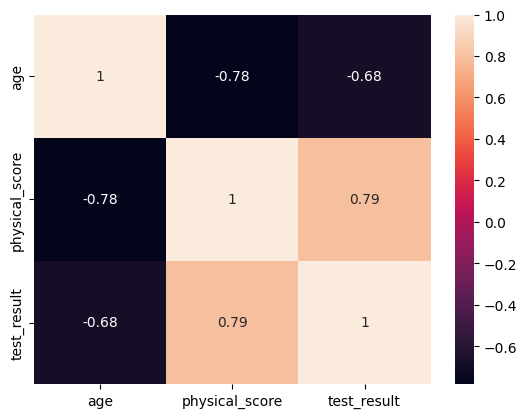

In [11]:
sns.heatmap(df.corr(),annot=True)

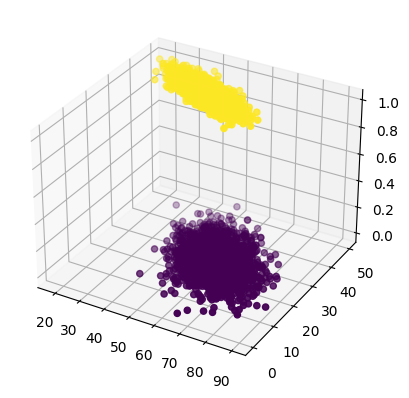

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c = df['test_result'])

In [13]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [14]:
X = df.drop('test_result',axis = 1)
y = df['test_result']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [17]:
scaler = StandardScaler()

In [44]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


(       age  physical_score
 1840  50.0            25.9
 2115  53.0            33.1
 4437  53.0            34.6
 1146  41.0            39.4
 2486  65.0            18.7
 ...    ...             ...
 4426  72.0            20.3
 466   31.0            43.2
 3092  72.0            18.4
 3772  38.0            38.9
 860   56.0            35.8
 
 [3500 rows x 2 columns],
 array([[-0.13926024, -0.86078739],
        [ 0.12718154,  0.02983222],
        [ 0.12718154,  0.21537798],
        ...,
        [ 1.81464618, -1.78851615],
        [-1.20502738,  0.7472758 ],
        [ 0.39362333,  0.36381458]]))

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression()

In [21]:
model.fit(scaled_X_train,y_train)

LogisticRegression()

In [22]:
pred = model.predict(scaled_X_test)

In [23]:
pred

array([1, 0, 1, ..., 1, 1, 1])

In [24]:
model.coef_

array([[-0.96920669,  3.5691453 ]])

In [25]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [26]:
## Performane Metrics

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
accuracy_score(y_test,pred)

0.9053333333333333

In [29]:
confusion_matrix = confusion_matrix(y_test,pred)

In [30]:
from sklearn.metrics import plot_confusion_matrix,ConfusionMatrixDisplay


/Users/kathanbhavsar/Desktop/anaconda3/envs/kathan/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


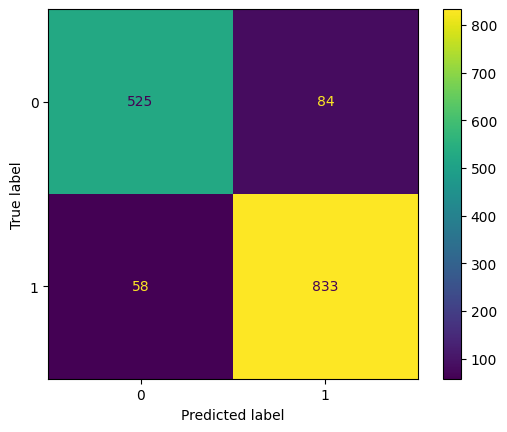

In [31]:
plot_confusion_matrix(model,scaled_X_test,y_test)
plt.show()

/Users/kathanbhavsar/Desktop/anaconda3/envs/kathan/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


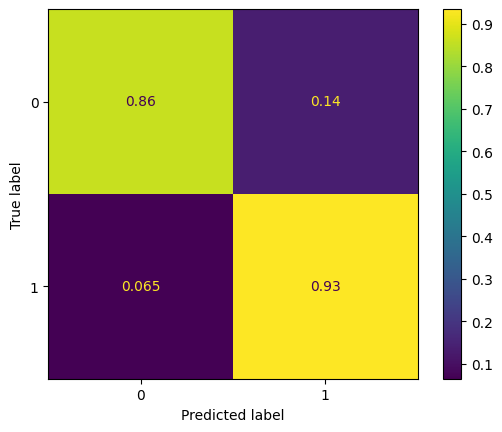

In [32]:
plot_confusion_matrix(model,scaled_X_test,y_test,normalize='true')
plt.show()

In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       609
           1       0.91      0.93      0.92       891

    accuracy                           0.91      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.91      0.91      0.90      1500



In [34]:
from sklearn.metrics import precision_score,recall_score

In [35]:
precision_score(y_test,pred)

0.9083969465648855

In [36]:
recall_score(y_test,pred)

0.9349046015712682

In [37]:
##Roc curve

In [38]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

/Users/kathanbhavsar/Desktop/anaconda3/envs/kathan/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


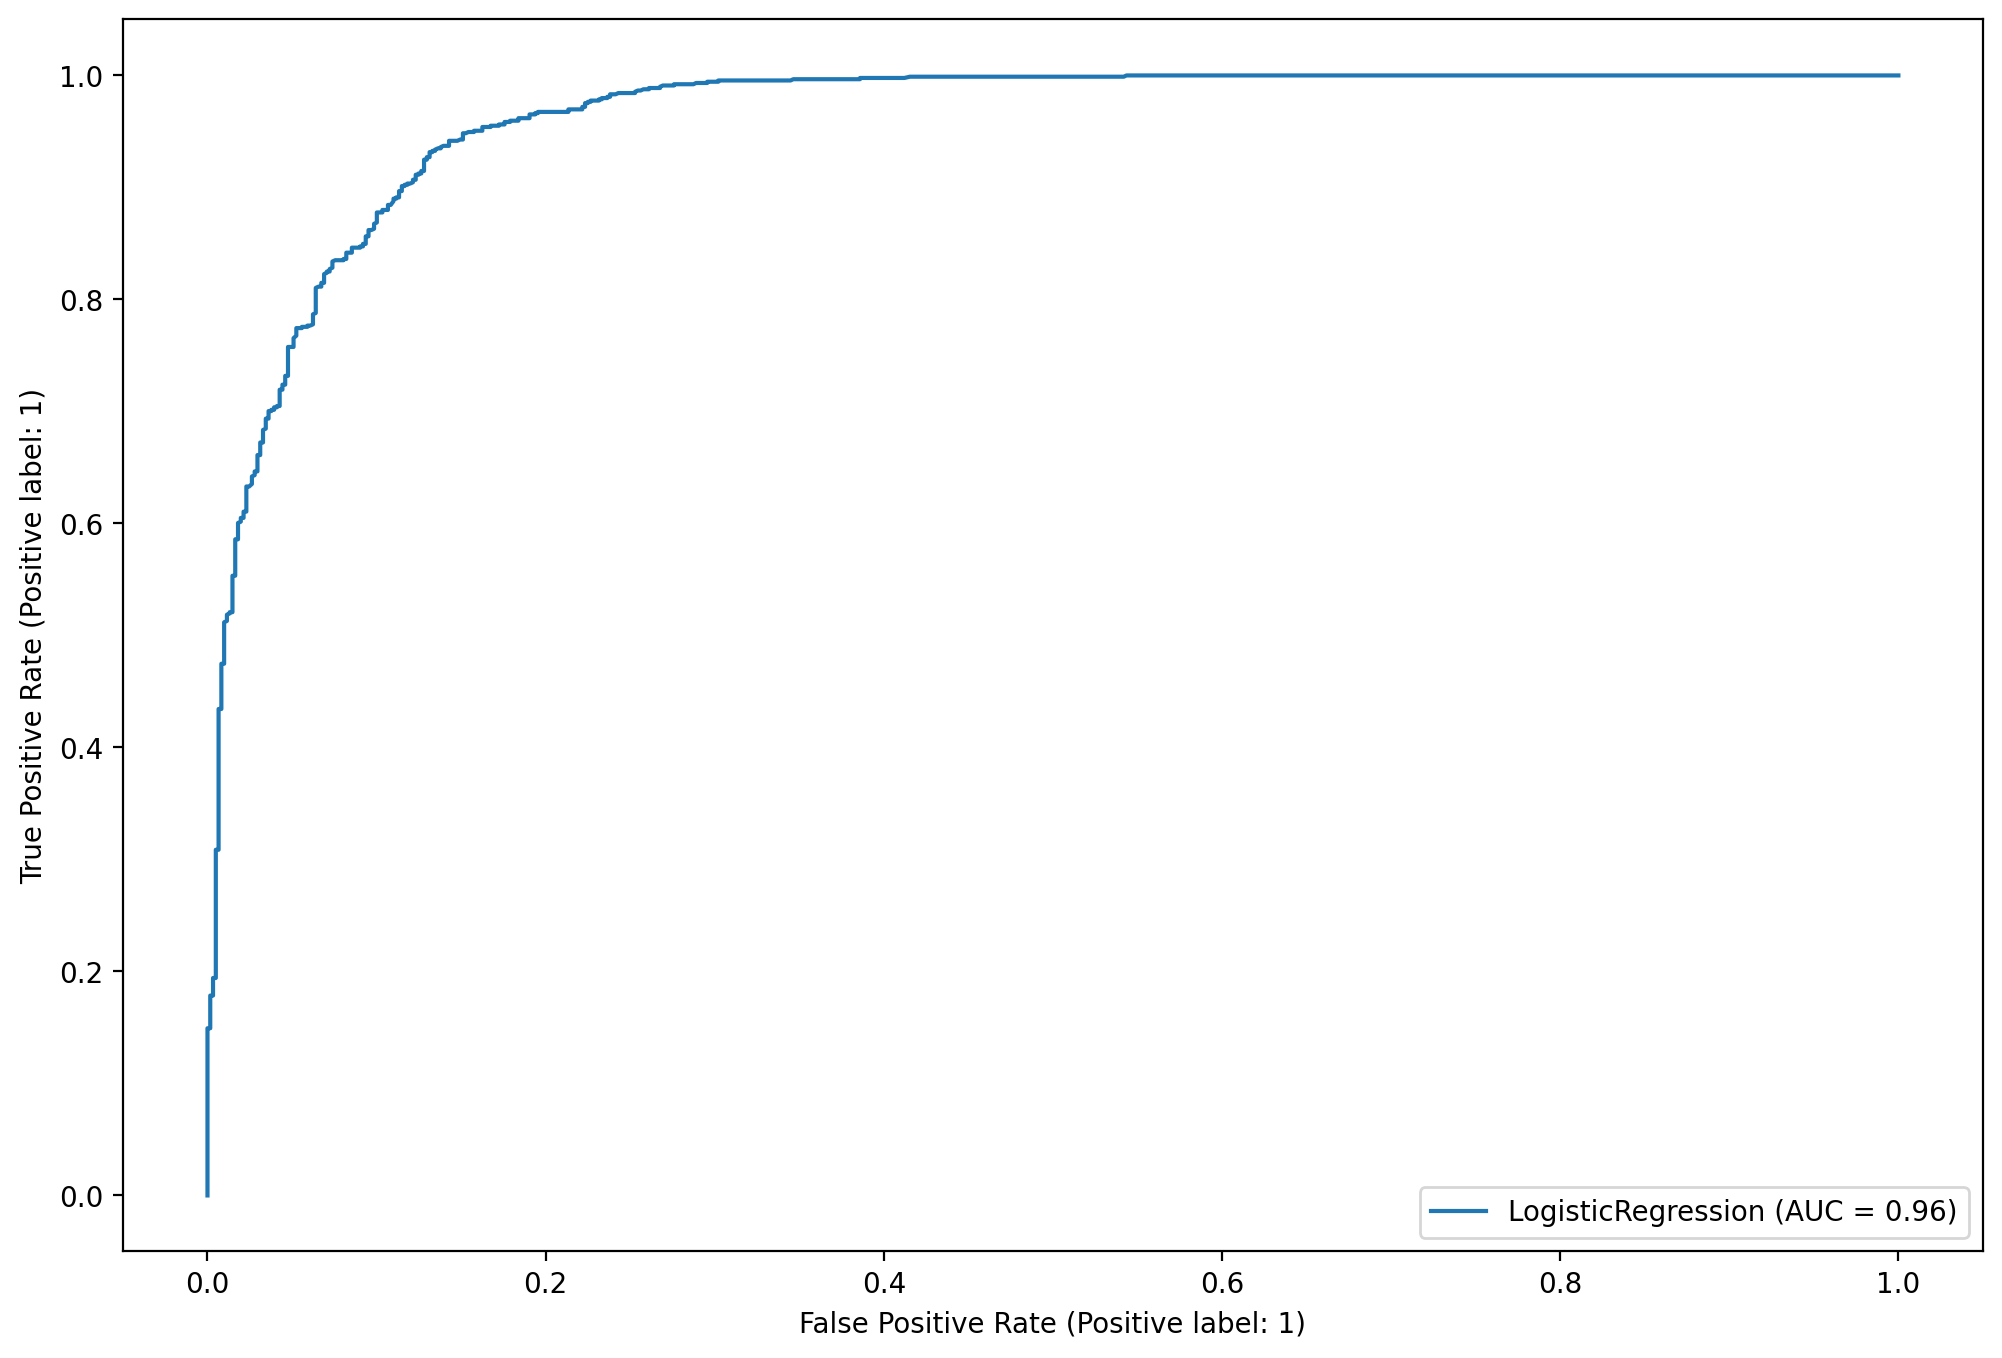

In [39]:
fig,ax = plt.subplots(figsize=(12,8),dpi = 200)
plot_roc_curve(model,scaled_X_test,y_test,ax=ax)

/Users/kathanbhavsar/Desktop/anaconda3/envs/kathan/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


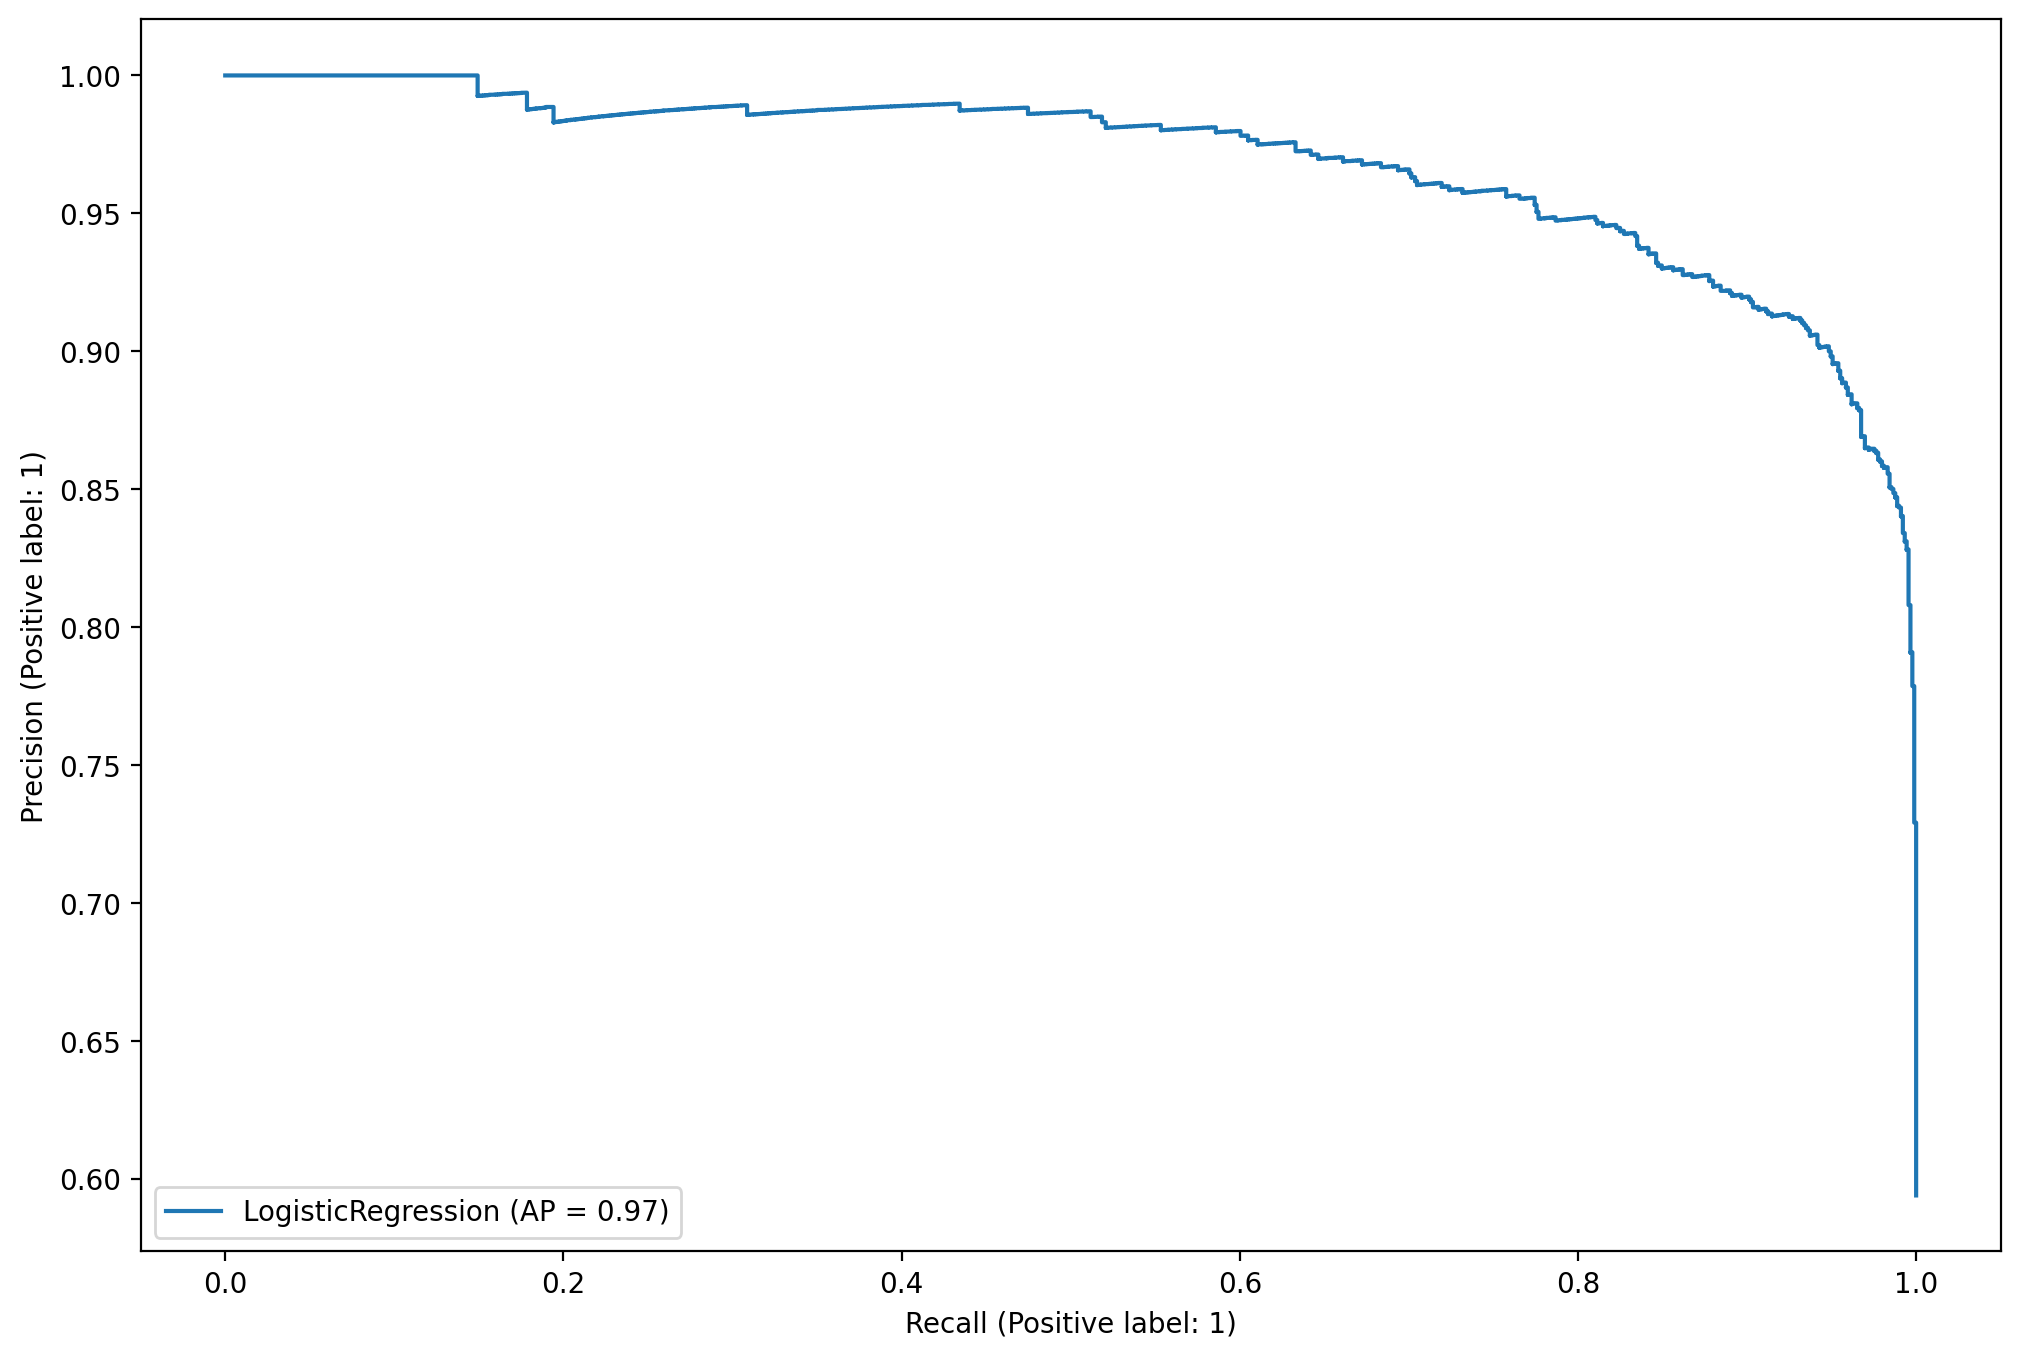

In [40]:
fig,ax = plt.subplots(figsize=(12,8),dpi = 200)
plot_precision_recall_curve(model,scaled_X_test,y_test,ax=ax)

In [41]:
model.predict_proba(scaled_X_test)

array([[0.0368081 , 0.9631919 ],
       [0.97974273, 0.02025727],
       [0.03057777, 0.96942223],
       ...,
       [0.0117492 , 0.9882508 ],
       [0.06731479, 0.93268521],
       [0.00110932, 0.99889068]])